In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from datasets import *
from decision_tree import *
from visual_utils import *


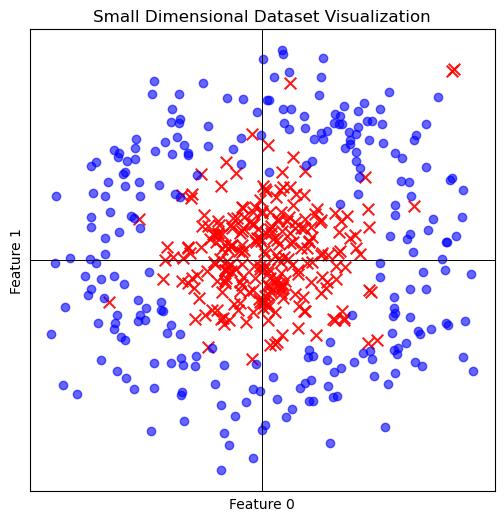

In [2]:
dataset_dict = generate_small_dataset()
visualize_small_dataset(dataset_dict["data"], dataset_dict["labels"])

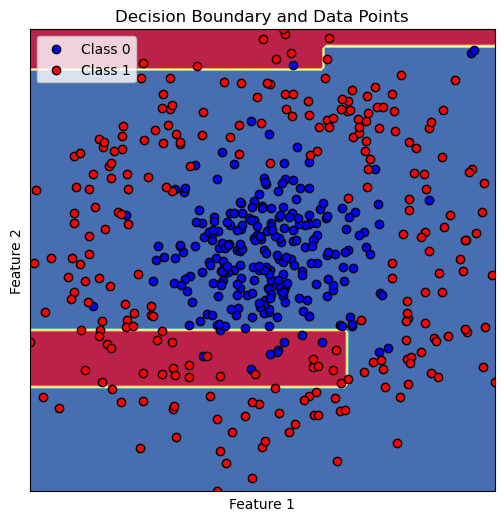

accuracy:  0.544


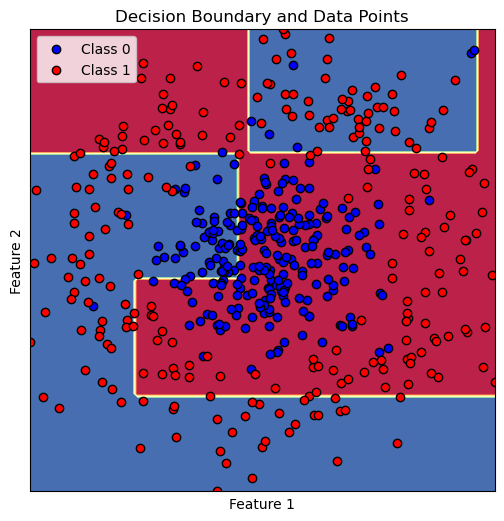

accuracy:  0.352


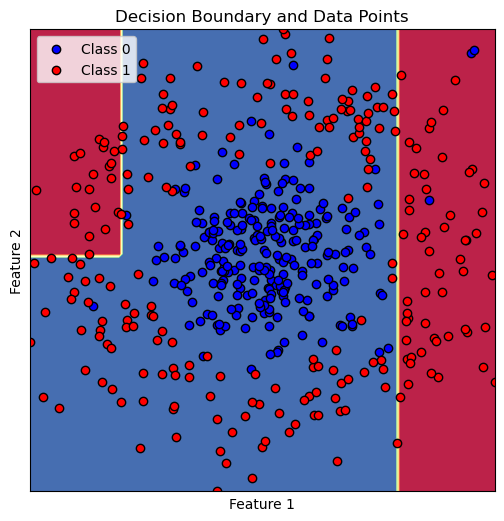

accuracy:  0.642


In [11]:
tree = Tree(
    feature_bounds=dataset_dict["feature_bounds"], generation_type="basic"
)
visualise_tree_decision( tree, dataset_dict)
print("accuracy: ",tree.calculate_accuracy(dataset_dict))

tree2 = Tree(feature_bounds=dataset_dict["feature_bounds"], generation_type="coinflip",p_add=0.8)
visualise_tree_decision( tree2, dataset_dict)
print("accuracy: ",tree2.calculate_accuracy(dataset_dict))

tree3 = Tree(feature_bounds=dataset_dict["feature_bounds"], generation_type="clever")
visualise_tree_decision(tree3, dataset_dict)
print("accuracy: ", tree3.calculate_accuracy(dataset_dict))

In [12]:
print("tree 1:")
tree.print_tree_traverse()
print("\ntree 2:")
tree2.print_tree_traverse()
print("\ntree 3:")
tree3.print_tree_traverse()

tree 1:
f: 1: 1 thr: -0.306 depth: 0 left: f: 0: -1 thr: 0.368 depth: 1 right: f: 1: 1 thr: -0.477 depth: 1
f: 0: -1 thr: 0.368 depth: 1 left: f: 1: 1 thr: -0.539 depth: 2 right: f: 1: -1 thr: -0.169 depth: 2
f: 1: 1 thr: -0.539 depth: 2 left: f: 1: -1 thr: -0.445 depth: 3 right: f: 1: -1 thr: -0.755 depth: 3
f: 1: -1 thr: -0.445 depth: 3 left: leaf: 0 right: leaf: 1
f: 1: -1 thr: -0.755 depth: 3 left: leaf: 0 right: leaf: 1
f: 1: -1 thr: -0.169 depth: 2 left: f: 1: -1 thr: -0.123 depth: 3 right: f: 1: -1 thr: -0.408 depth: 3
f: 1: -1 thr: -0.123 depth: 3 left: leaf: 0 right: leaf: 1
f: 1: -1 thr: -0.408 depth: 3 left: leaf: 0 right: leaf: 1
f: 1: 1 thr: -0.477 depth: 1 left: f: 1: -1 thr: 0.763 depth: 2 right: f: 0: -1 thr: 0.255 depth: 2
f: 1: -1 thr: 0.763 depth: 2 left: f: 0: 1 thr: -0.444 depth: 3 right: f: 1: -1 thr: -0.769 depth: 3
f: 0: 1 thr: -0.444 depth: 3 left: leaf: 0 right: leaf: 1
f: 1: -1 thr: -0.769 depth: 3 left: leaf: 0 right: leaf: 1
f: 0: -1 thr: 0.255 depth: 2 lef

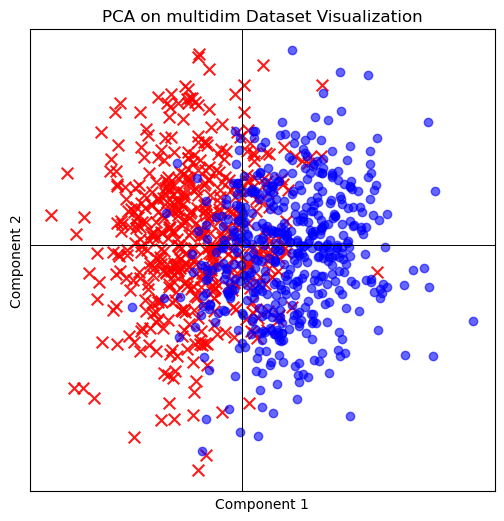

In [5]:
# dataset_dict = generate_small_dataset()
dataset_dict = generate_multidimensional_dataset()
visualize_multidimensional_dataset(dataset_dict["data"], dataset_dict["labels"])

In [ ]:
samples = 10_000
dataset_dict = generate_small_dataset()

# accs = []
# sizes = []
# for i in range(samples):
#     tree = Tree(
#         feature_bounds=dataset_dict["feature_bounds"], generation_type="basic"
#     )
#     accs.append(tree.calculate_accuracy(dataset_dict))
#     sizes.append(tree.size())
# print("basic: ", np.mean(np.array(accs)), np.mean(np.array(sizes)))

accs = []
sizes = []
for i in range(samples):
    tree = Tree(
        feature_bounds=dataset_dict["feature_bounds"], generation_type="coinflip",p_add=0.8
    )
    accs.append(tree.calculate_accuracy(dataset_dict))
    sizes.append(tree.size())
print("coinflip: ", np.mean(np.array(accs)), np.mean(np.array(sizes)))

# accs = []
# sizes = []
# for i in range(samples):
#     tree = Tree(
#         feature_bounds=dataset_dict["feature_bounds"], generation_type="clever"
#     )
#     accs.append(tree.calculate_accuracy(dataset_dict))
#     sizes.append(tree.size())
# print("clever: ", np.mean(np.array(accs)), np.mean(np.array(sizes)))

adding from:  0
adding from:  0
adding from:  0
adding from:  0
adding from:  0
adding from:  0
adding from:  1
adding from:  0
adding from:  1
adding from:  0
adding from:  0
adding from:  0
adding from:  0
adding from:  0
adding from:  1
adding from:  0
adding from:  0
adding from:  0
adding from:  0
adding from:  0
adding from:  0
adding from:  0
adding from:  0
adding from:  0
adding from:  0
adding from:  0
adding from:  0
adding from:  0
adding from:  0
adding from:  1
adding from:  0
adding from:  0
adding from:  0
adding from:  0
adding from:  0
adding from:  0
adding from:  0
adding from:  0
adding from:  0
adding from:  0
adding from:  0
adding from:  0
adding from:  1
adding from:  0
adding from:  0
adding from:  0
adding from:  1
adding from:  0
adding from:  0
adding from:  1
adding from:  0
adding from:  1
adding from:  1
adding from:  0
adding from:  0
adding from:  0
adding from:  0
adding from:  0
adding from:  0
adding from:  0
adding from:  0
adding from:  0
adding f